In [37]:
import matplotlib.pyplot as plt
import json
import itertools
import pandas as pd
import numpy as np

In [40]:
with open('results.json') as f:
    data = json.load(f)
    
data_list = []

for run_idx, run in enumerate(data):
    for planner_run in run['planner_runs']:
        for ptp_idx, ptp_run in enumerate(planner_run['segments']):
            data_list.append({
                'run_idx': run_idx,
                'ptp_idx': ptp_idx,
                'apples': run['number_of_apples'],
                **planner_run,
                **ptp_run
            })
        
data_df = pd.DataFrame(data_list)

data_df

,run_idx,ptp_idx,apples,intermediate_planner,ordering,segments,apple,feasible_solve_milliseconds,path_length,prm_edges_after_solve,prm_nodes_after_solve,solved
0,0,0,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[1.1685069894275073, -4.256360628607036, 3.640...",9,170.974549,58,11,True
1,0,1,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[0.8239779982303259, -1.2304805353958383, 3.69...",4,227.452450,88,16,True
2,0,2,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[-0.6788321044944504, -3.782591210366942, 7.56...",3,33.208163,122,21,True
3,0,3,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[-1.9193774078884092, -5.375168215638294, 5.21...",2,105.119109,152,26,True
4,0,4,7,PRM,random,"[{'apple': [1.1685069894275073, -4.25636062860...","[0.9876616191886287, -4.070496878999986, 3.634...",2,66.638524,182,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11147,49,89,94,RRTConnect,nearest neighbour,"[{'apple': [-5.032753935544891, -3.63169159483...","[0.1584919605906444, -0.48415090350315076, 2.9...",2,237.120283,5,6,True
11148,49,90,94,RRTConnect,nearest neighbour,"[{'apple': [-5.032753935544891, -3.63169159483...","[0.2810093990965328, -0.2243675080283078, 2.57...",2,353.093419,8,12,True
11149,49,91,94,RRTConnect,nearest neighbour,"[{'apple': [-5.032753935544891, -3.63169159483...","[0.25718108086043423, 0.2172677629393441, 2.09...",1,220.020837,7,8,True
11150,49,92,94,RRTConnect,nearest neighbour,"[{'apple': [-5.032753935544891, -3.63169159483...","[0.05549138247664259, 0.3244261929580139, 1.41...",0,224.925916,3,4,True


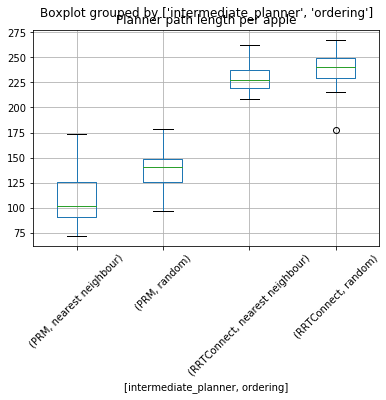

In [3]:
per_run_mean = data_df[(data_df.solved) & (data_df.ptp_idx != 0)]\
    .groupby(['intermediate_planner', 'ordering', 'run_idx'])\
    .path_length\
    .mean()\
    .to_frame()\
    .boxplot(by=['intermediate_planner','ordering'], rot=45)

plt.title('Planner path length per apple')
plt.show()

(0.9, 1)

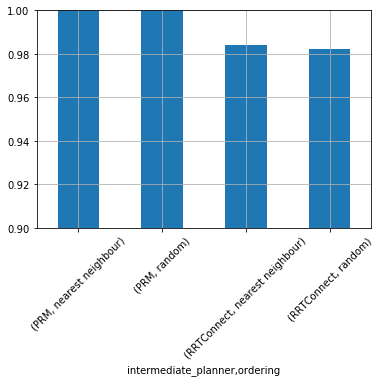

In [4]:
# TODO: Shoujld I be taking the mean on a per-run basis? This current method is biased to runs with many apples.
data_df[(data_df.ptp_idx != 0)]\
    .groupby(['intermediate_planner', 'ordering'])\
    .solved.mean()\
    .plot(kind='bar',rot=45,grid=True)

plt.ylim(0.9,1)

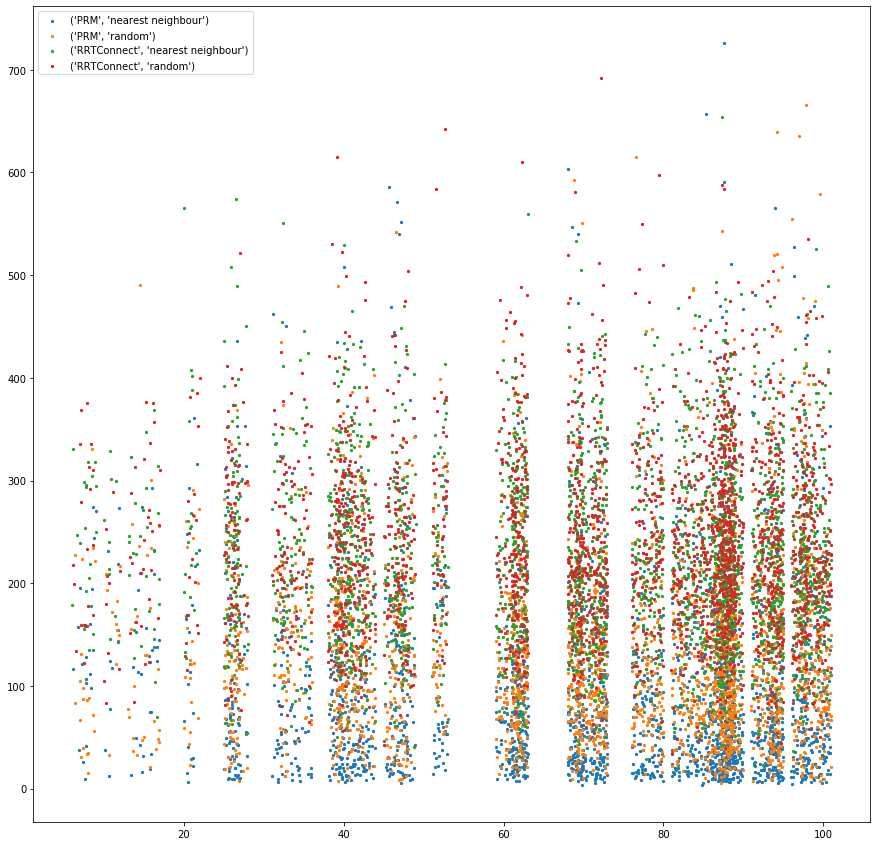

In [39]:
plt.figure(figsize=(15,15))

grouped = data_df[(data_df.ptp_idx != 0)].groupby(['intermediate_planner', 'ordering'])

for idx, (label, df) in enumerate(grouped):
    plt.scatter(x=df.apples + np.random.uniform(-1,1,len(df.apples)), y=df.path_length,s=5,label=label)
    
plt.legend()

Text(0.5, 1.0, 'Mean point-to-point path length by total number of apples')

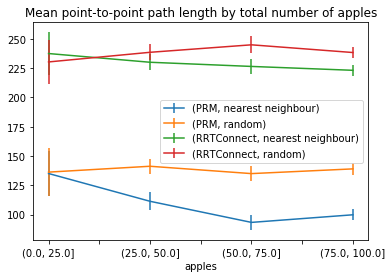

In [86]:
bins = np.linspace(0,100,5)

grouped = data_df[(data_df.ptp_idx != 0)].groupby(['intermediate_planner', 'ordering'])

for idx, (label, df) in enumerate(grouped):
    agg = df.groupby(pd.cut(df.apples, bins)).path_length.agg(['mean','std','count'])
    agg['std_error'] = agg['std'] / np.sqrt(agg['count'])
    

    agg['mean'].plot(label=label, yerr=1.96 * agg['std_error'])
    
plt.legend()
plt.title("Mean point-to-point path length by total number of apples")

In [77]:

agg

mean        std  count  \
intermediate_planner ordering                                          
PRM                  nearest neighbour  101.894431  91.960452   2738   
                     random             138.470157  88.621936   2738   
RRTConnect           nearest neighbour  225.798044  85.731675   2694   
                     random             239.618842  88.468889   2690   

                                        conf_radius  
intermediate_planner ordering                        
PRM                  nearest neighbour     1.757456  
                     random                1.693653  
RRTConnect           nearest neighbour     1.651743  
                     random                1.705746